# **Recommended Analysis**
Below are the few recommendations from Maven Analytics.
1. Which category has the highest success percentage? 
1. How many projects have been successful?
1. What project with a goal over $1,000 USD, had the biggest Goal Completion % (Pledged / Goal)? 
1. How much money was pledged?
1. Can you identify any trends in project success rates over the years?
1. As an investor, what types of projects should you be looking at to guarantee future success?


In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sn;
import matplotlib.pyplot as plt;

In [2]:
df = pd.read_csv('/kaggle/input/kickstarter-project/kickstarter_projects.csv');

In [3]:
df.head();

In [4]:
df.tail();

Count of rows and attributes in the dataset

In [5]:
df.shape;

In [6]:
df.describe();

Look for outliers

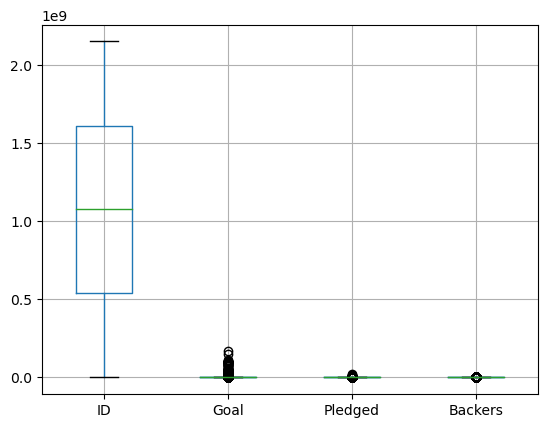

In [7]:
df.boxplot();

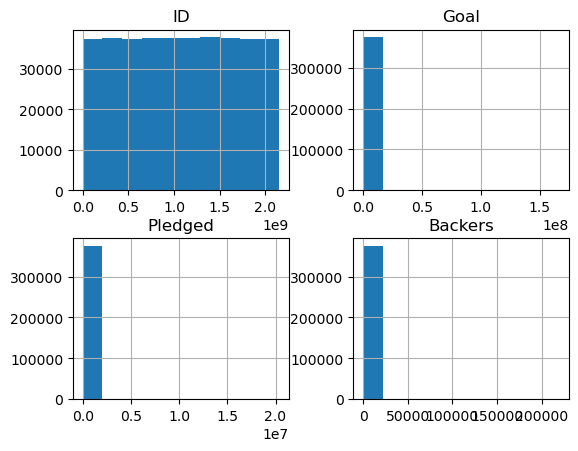

In [8]:
df.hist();

In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [10]:
df.isnull().sum();

There are no null values.

# **Data Exploration**
We are going to get some information from the data such as number of successful projects and failed projects, number of backers against successful projects and the goal.

Number of projects in each category.

Checking at the values of some categorical attributes to ensure the data integrity.

In [11]:
print(df['State'].unique());

['Failed' 'Successful' 'Canceled' 'Suspended' 'Live']


In [12]:
print(df['Country'].unique());

['United States' 'United Kingdom' 'Canada' 'Australia' 'New Zealand'
 'Netherlands ' 'Sweden' 'Denmark' 'Norway' 'Ireland' 'Germany' 'France'
 'Spain' 'Belgium' 'Italy' 'Switzerland' 'Austria' 'Luxembourg'
 'Singapore' 'Hong Kong' 'Mexico' 'Japan']


In [13]:
print(df['Subcategory'].nunique());

159


There are 159 Subcategories in the dataset.

In [14]:
print(df['Country'].value_counts());

United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: Country, dtype: int64


United States has the maximum number of starter projects.

In [15]:
print(df["Category"].value_counts());

Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: Category, dtype: int64


Getting the number of projects across the current state of condition.

In [16]:
print(df["State"].value_counts(sort=True))

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64


In [17]:
df['Goal'].min()

0

In [18]:
df['Goal'].max()

166361391

In [19]:
df['Goal'].mean()

45863.78479563989

# **Data Analysis**

**Checking for successful projects across the categories**

In [20]:
    srt=df[["Category","State"]]
    succ=srt[srt["State"]=="Successful"];
    fail=srt[srt["State"]=="Failed"];
    succ

,Category,State
2,Art,Successful
3,Technology,Successful
5,Journalism,Successful
7,Publishing,Successful
10,Photography,Successful
...,...,...
374310,Games,Successful
374400,Games,Successful
374458,Fashion,Successful
374530,Games,Successful


**Getting the details about projects in each category per country**

In [21]:
proj_country=df.groupby(["Country","Category"])["State"].value_counts(sort=True)
proj_country

Country        Category  State     
Australia      Art       Failed         248
                         Successful     134
                         Canceled        38
                         Live             4
                         Suspended        1
                                       ... 
United States  Theater   Successful    5221
                         Failed        2973
                         Canceled       474
                         Live            29
                         Suspended       11
Name: State, Length: 1271, dtype: int64

In [22]:
proj_country_stats=df.groupby(["Country","Category"])["Goal"].agg([min,max,np.mean, np.median])
proj_country_stats

min        max           mean   median
Country       Category                                           
Australia     Art            1   19136558   79043.152941   2300.0
              Comics         1     394135    7866.047872   2242.5
              Crafts         9     509364   11856.344262   1712.0
              Dance         39      22974    3783.718750   1869.5
              Design         1    1421411   32094.072121  11082.0
...                        ...        ...            ...      ...
United States Music          1   50000000   15831.259477   4000.0
              Photography    1   10000000   12742.446294   4000.0
              Publishing     0  100000000   26743.173202   5000.0
              Technology     1  100000000  100281.630265  20000.0
              Theater        1   40000000   28201.035255   3500.0

[322 rows x 4 columns]

**Which category has the highest success percentage?**

In [23]:
condition = df["State"] == "Successful"
count=condition.value_counts()[1]
count

133851

In [24]:
c=  df[df["State"] == "Successful"].count()[0]
c

133851

**From the entire list of proposals, 35% were successful**

In [25]:
s=c/len(df)
s

0.35707597378172246

In [26]:
df1 = df[condition]
suc=df1.groupby("Category")["State"].value_counts().nlargest(5)
suc

Category      State     
Music         Successful    24105
Film & Video  Successful    23612
Games         Successful    12518
Publishing    Successful    12300
Art           Successful    11510
Name: State, dtype: int64

In [27]:
suc_prop = suc[0]/c
suc_prop

0.18008830714749982

18% of Music projects are successful.